In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
run TP1920.py

In [42]:
resizeImageAndConvert()

In [3]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

24

In [4]:
X[1].shape

(65025,)

In [5]:
X.shape

(24, 65025)

In [6]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 0.8)
eigenvalues

6


array([1.16482459e+09, 6.65407950e+08, 3.24760505e+08, 2.22618040e+08,
       1.73656083e+08, 1.36107209e+08, 1.04745721e+08, 9.11212493e+07,
       8.44428539e+07, 7.18356602e+07, 4.26121167e+07, 4.17523496e+07,
       3.50936910e+07, 2.83253476e+07, 2.71235127e+07, 2.21180971e+07,
       1.67508118e+07, 1.53738586e+07, 1.27565694e+07, 9.10217833e+06,
       8.26444459e+06, 6.95628625e+06, 5.89504571e+06, 7.48308170e-23])

23


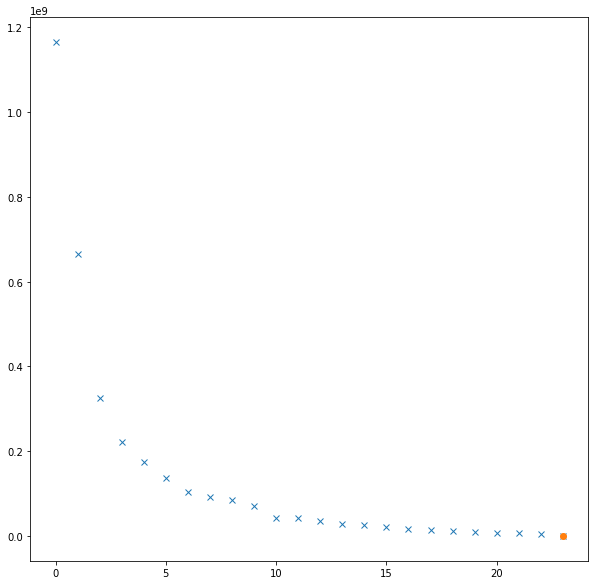

In [7]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 1)
# Alterar nome da variável
ponto=eigenvalues
# Obter o gráfico do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, eigenvalues, 'x')
plt.plot(np.argmin(ponto), eigenvalues[np.argmin(ponto)], 'o')
plt.show()

In [8]:
eigenvectors.T[0]

array([-0.00064431, -0.00063524, -0.00065391, ...,  0.00606382,
        0.00571354,  0.00595939])

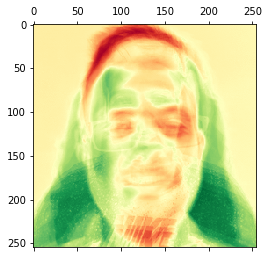

In [9]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap=plt.cm.RdYlGn))

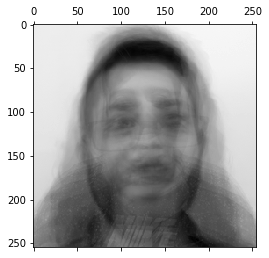

In [10]:
# Exemplo da "cara média" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [11]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

[array([ 5688.29823502,   411.34834378,  1437.42436163, -2156.51151566,
         -963.31270131,  3056.39501662, -2765.40207745,   387.20841389,
         1176.9905382 , -1105.04458686,  1463.76214579,  4334.95189456,
         -740.15838562,  1670.32815889,  -735.4152381 ,   723.80263468,
         -682.72485847,    89.23874202,  -657.08379795,    27.97777944,
           33.33022519,   -44.32459709,    36.3921578 ]),
 array([-3.38041762e+03, -1.90865858e+03,  1.34910147e+04,  6.91564433e+03,
         5.58590471e+02,  3.84092500e+03,  1.22983151e+03,  5.41631789e+02,
         1.92198467e+02,  1.75116454e+01, -4.87117909e+02, -5.43830624e+02,
         4.24818184e+01, -3.27421415e+02, -2.33085202e+02, -2.09783501e+02,
        -5.29916895e+02, -8.68592506e+01, -1.32750262e+01, -1.04945387e+02,
        -2.02806732e+01, -3.22504097e+01,  4.41474671e+01]),
 array([-6870.84269354,  7204.64440694,  -945.60914697,  3076.01467227,
        -1874.14084266,  -403.37580336, -1925.56893223, -1545.1015826

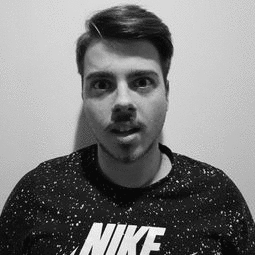

In [24]:
# Imagem para teste
input_img = Image.open('TestSet/joaop_surprised.gif').convert('L')
input_img

Imagem nr.: 14
Distancia minima: 6240.17
Distancia máxima: 20970.39



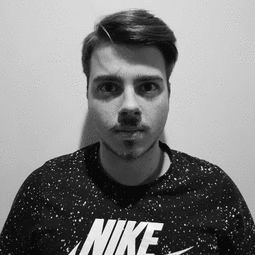

In [25]:
# Teste do reconhecimento
dist, test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, X.shape[0], coef_proj, 'euclidian')
#print(np.argmin(dist))
lista[np.argmin(dist)]


In [537]:
coef_proj = np.reshape(coef_proj, (1,552))
distance = np.sum(np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:5]))
distance

ValueError: operands could not be broadcast together with shapes (23,) (5,) 

In [538]:
def mahalanobis(x, y, eigenvalues, k):
    if x.shape[0] != y.shape[0]:
        return (-1)
    N = x.shape[1]
    distance=[0]*N
    for i in range(N):
        distance[i] = [np.sum(np.divide((x[:,i]-y)**2, eigenvalues[:k]))]
    return distance

In [539]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist=[]
mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])

[[1.3214573452696445],
 [8.284427590263725],
 [21.005694051251762],
 [8.690629574379582],
 [3.367611035251314],
 [9.8769523085109],
 [9.507257014294467],
 [2.8611844961152944],
 [9.597659710278135],
 [11.308826244743237],
 [9.414449494617458],
 [7.833099592356919],
 [9.590595797148307],
 [4.499285274787751],
 [6.59775707233529],
 [6.162434971880788],
 [2.5237770188080892],
 [2.9829396029266335],
 [4.22653687689232],
 [2.8666057690119446],
 [2.284721799594759],
 [1.8189309876855593],
 [2.342525331418018],
 [1.8054260653350067]]

In [540]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.